In [147]:
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

# Data set

In [2]:
# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg", "img47.jpg", "img48.jpg", "img49.jpg", "img50.jpg", "img51.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg", "img53.jpg", "img54.jpg", "img55.jpg", "img56.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg", "img57.jpg", "img58.jpg"],
    "Jack": ["img16.jpg", "img17.jpg", "img59.jpg", "img61.jpg", "img62.jpg"],
    "Elon": ["img18.jpg", "img19.jpg", "img67.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"],
    "Katy": ["img26.jpg", "img27.jpg", "img28.jpg", "img42.jpg", "img43.jpg", "img44.jpg", "img45.jpg", "img46.jpg"],
    "Matt": ["img29.jpg", "img30.jpg", "img31.jpg", "img32.jpg", "img33.jpg"],
    "Leonardo": ["img34.jpg", "img35.jpg", "img36.jpg", "img37.jpg"],
    "George": ["img38.jpg", "img39.jpg", "img40.jpg", "img41.jpg"]
    
}

# Positive samples
Find different photos of same people

In [3]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [4]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [9]:
positives.shape

(167, 3)

# Negative samples
Compare photos of different people

In [5]:
samples_list = list(idendities.values())

In [6]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

In [7]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [11]:
negatives = negatives.sample(positives.shape[0])

In [12]:
negatives.shape

(167, 3)

# Merge Positives and Negative Samples

In [13]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [14]:
df.shape

(334, 3)

In [15]:
df.decision.value_counts()

Yes    167
No     167
Name: decision, dtype: int64

In [16]:
df.file_x = "deepface/tests/dataset/"+df.file_x
df.file_y = "deepface/tests/dataset/"+df.file_y

# DeepFace

In [17]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

Using TensorFlow backend.


In [18]:
pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")

pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")

pretrained_models["OpenFace"] = OpenFace.loadModel() 
print("OpenFace loaded")

pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

VGG-Face loaded
Facenet loaded
OpenFace loaded
FbDeepFace loaded


In [19]:
instances = df[["file_x", "file_y"]].values.tolist()

In [20]:
models = ['VGG-Face', 'Facenet', 'OpenFace', 'DeepFace']
metrics = ['cosine', 'euclidean_l2']

In [21]:
if True:
    for model in models:
        for metric in metrics:

            resp_obj = DeepFace.verify(instances
                                       , model_name = model
                                       , model = pretrained_models[model]
                                       , distance_metric = metric)

            distances = []

            for i in range(0, len(instances)):
                distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
                distances.append(distance)

            df['%s_%s' % (model, metric)] = distances
    
    df.to_csv("face-recognition-pivot.csv", index = False)
else:
    df = pd.read_csv("face-recognition-pivot.csv")

Already built model is passed


Verification: 100%|██████████| 334/334 [14:34<00:00,  2.62s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [14:18<00:00,  2.57s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [09:56<00:00,  1.78s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [10:47<00:00,  1.94s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [06:34<00:00,  1.18s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [07:15<00:00,  1.30s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [07:31<00:00,  1.35s/it]


Already built model is passed


Verification: 100%|██████████| 334/334 [07:46<00:00,  1.40s/it]


In [64]:
df_raw = df.copy()

In [65]:
df.head()

,file_x,file_y,decision,VGG-Face_cosine,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean_l2,OpenFace_cosine,OpenFace_euclidean_l2,DeepFace_cosine,DeepFace_euclidean_l2
0,deepface/tests/dataset/img8.jpg,deepface/tests/dataset/img9.jpg,Yes,0.3147,0.7933,0.1976,0.6287,0.0997,0.4466,0.1695,0.5822
1,deepface/tests/dataset/img8.jpg,deepface/tests/dataset/img47.jpg,Yes,0.3638,0.8530,0.1976,0.6287,0.0931,0.4314,0.1869,0.6114
2,deepface/tests/dataset/img8.jpg,deepface/tests/dataset/img48.jpg,Yes,0.3068,0.7834,0.2593,0.7201,0.1319,0.5136,0.2194,0.6624
3,deepface/tests/dataset/img8.jpg,deepface/tests/dataset/img49.jpg,Yes,0.2353,0.6860,0.1797,0.5996,0.1472,0.5426,0.1904,0.6170
4,deepface/tests/dataset/img8.jpg,deepface/tests/dataset/img50.jpg,Yes,0.3583,0.8465,0.2400,0.6928,0.1320,0.5138,0.1380,0.5253


# Distribution

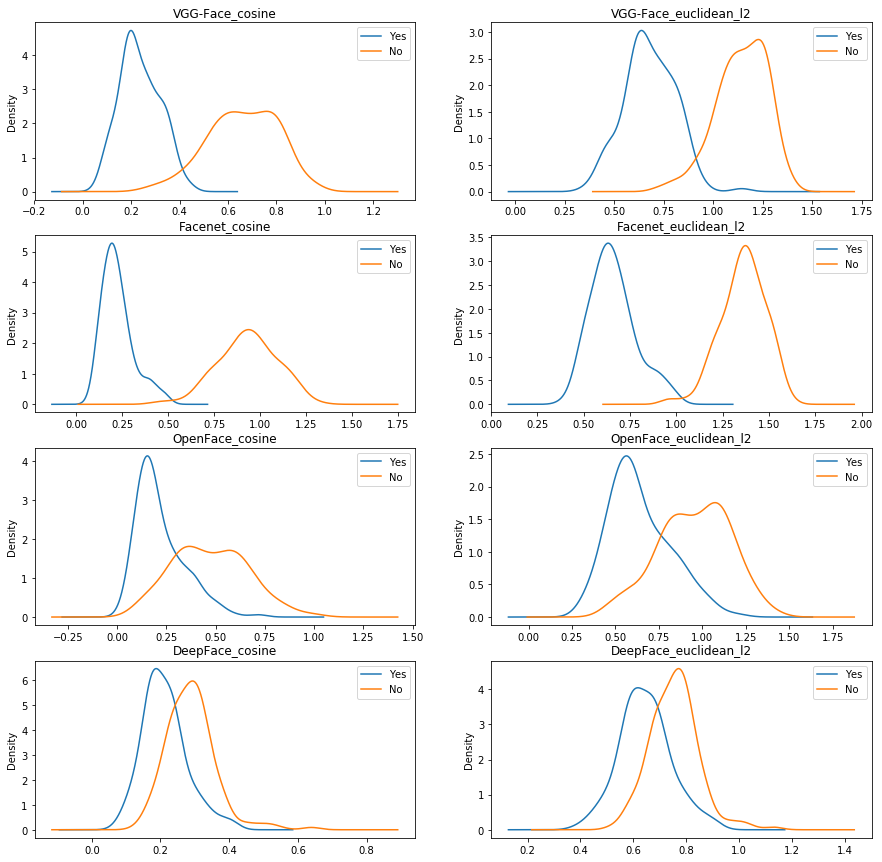

In [66]:
fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:
        
        feature = '%s_%s' % (model, metric)
        
        ax1 = fig.add_subplot(4, 2, figure_idx)
        
        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)
        
        figure_idx = figure_idx + 1

plt.show()

# Pre-processing for model

In [67]:
columns = []
for model in models:
    for metric in metrics:
        feature = '%s_%s' % (model, metric)
        columns.append(feature)

columns.append("decision")

In [68]:
df = df[columns]

In [75]:
df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

In [80]:
df.head()

,VGG-Face_cosine,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean_l2,OpenFace_cosine,OpenFace_euclidean_l2,DeepFace_cosine,DeepFace_euclidean_l2,decision
0,0.3147,0.7933,0.1976,0.6287,0.0997,0.4466,0.1695,0.5822,1
1,0.3638,0.8530,0.1976,0.6287,0.0931,0.4314,0.1869,0.6114,1
2,0.3068,0.7834,0.2593,0.7201,0.1319,0.5136,0.2194,0.6624,1
3,0.2353,0.6860,0.1797,0.5996,0.1472,0.5426,0.1904,0.6170,1
4,0.3583,0.8465,0.2400,0.6928,0.1320,0.5138,0.1380,0.5253,1


# Train test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
df_train, df_test = train_test_split(df, test_size=0.30, random_state=17)

In [86]:
target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

# LightGBM

In [81]:
import lightgbm as lgb

In [94]:
features = df.drop(columns=[target_name]).columns.tolist()

lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

In [95]:
params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
}

In [100]:
gbm = lgb.train(params, lgb_train, num_boost_round=250, early_stopping_rounds = 15 , valid_sets=lgb_test)

[1]	valid_0's multi_logloss: 0.607564
Training until validation scores don't improve for 15 rounds
[2]	valid_0's multi_logloss: 0.530974
[3]	valid_0's multi_logloss: 0.46737
[4]	valid_0's multi_logloss: 0.413739
[5]	valid_0's multi_logloss: 0.368084
[6]	valid_0's multi_logloss: 0.32886
[7]	valid_0's multi_logloss: 0.295086
[8]	valid_0's multi_logloss: 0.265713
[9]	valid_0's multi_logloss: 0.240001
[10]	valid_0's multi_logloss: 0.217589
[11]	valid_0's multi_logloss: 0.197774
[12]	valid_0's multi_logloss: 0.180478
[13]	valid_0's multi_logloss: 0.164216
[14]	valid_0's multi_logloss: 0.150409
[15]	valid_0's multi_logloss: 0.137384
[16]	valid_0's multi_logloss: 0.1265
[17]	valid_0's multi_logloss: 0.116161
[18]	valid_0's multi_logloss: 0.107604
[19]	valid_0's multi_logloss: 0.0996502
[20]	valid_0's multi_logloss: 0.0928946
[21]	valid_0's multi_logloss: 0.0861664
[22]	valid_0's multi_logloss: 0.0809035
[23]	valid_0's multi_logloss: 0.0756792
[24]	valid_0's multi_logloss: 0.0715751
[25]	valid

In [144]:
gbm.save_model("face-recognition-ensemble-model.txt")

# Evaluation

In [114]:
predictions = gbm.predict(x_test)

In [119]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    #print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

accuracy:  97.94 %


In [121]:
cm = confusion_matrix(y_test, prediction_classes)

In [122]:
cm

array([[58,  1],
       [ 1, 37]], dtype=int64)

In [124]:
tn, fp, fn, tp = cm.ravel()

In [125]:
tn, fp, fn, tp

(58, 1, 1, 37)

In [126]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [127]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  97.36842105263158 %
Recall:  97.36842105263158 %
F1 score  97.36842105263158 %
Accuracy:  97.9381443298969 %


# Interpretability

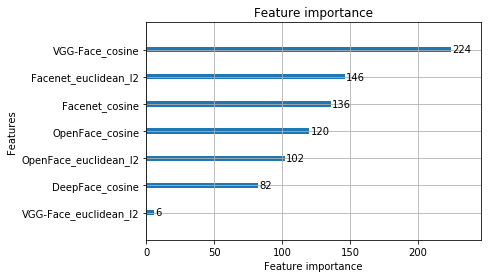

In [130]:
ax = lgb.plot_importance(gbm, max_num_features=20)
plt.show()

In [131]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

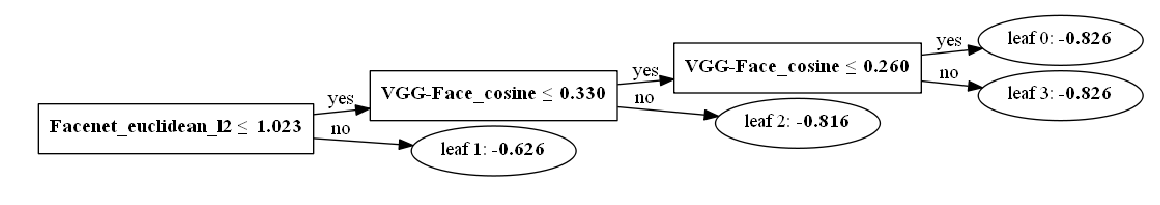

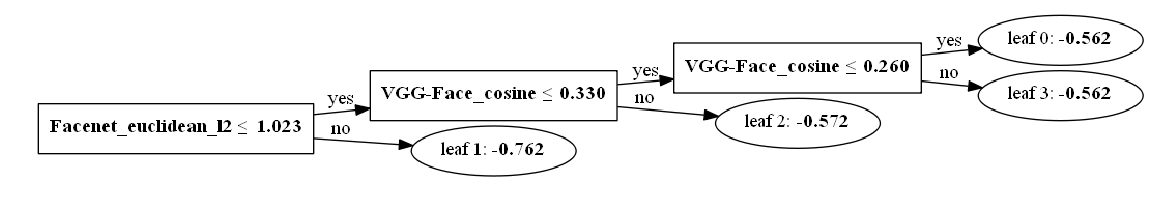

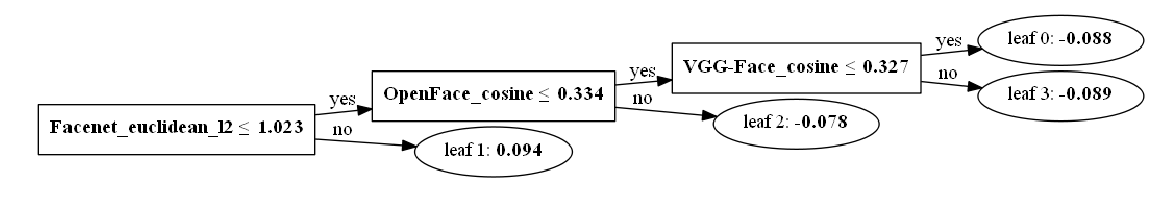

In [189]:
plt.rcParams["figure.figsize"] = [20, 20]

for i in range(0, gbm.num_trees()):
    ax = lgb.plot_tree(gbm, tree_index = i)
    plt.show()
    
    if i == 2:
        break

# ROC Curve

In [178]:
y_pred_proba = predictions[::,1]

In [181]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

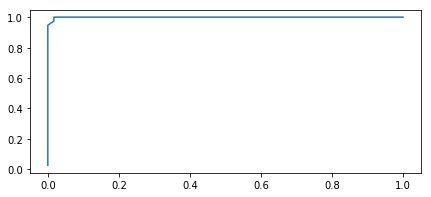

In [188]:
plt.figure(figsize=(7,3))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))